# Worksheet 21

Name:  Jackson Fisk
UID: U59841760

### Topics

- Logistic Regression

## Logistic Regression

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

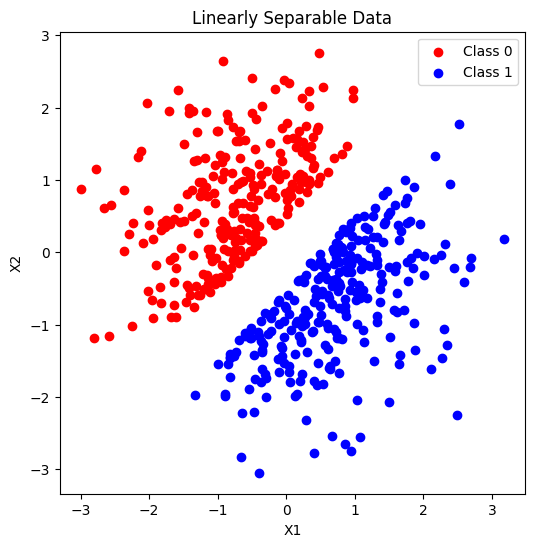

In [74]:
X, Y = generate_line_data()

plt.figure(figsize=(6, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [75]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 4.11337993 -4.10105513]]
Intercept: [0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

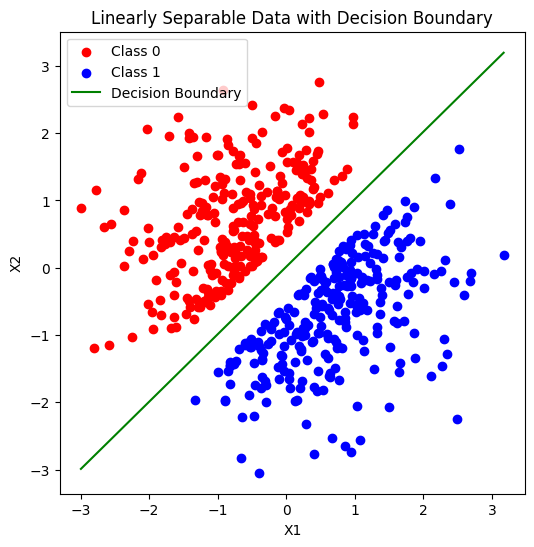

In [76]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = generate_line_data()

model = LogisticRegression().fit(X, Y)

coef = model.coef_[0]
intercept = model.intercept_[0]

plt.figure(figsize=(6, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = - (coef[0] / coef[1]) * x1 - (intercept / coef[1])
plt.plot(x1, x2, color='green', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data with Decision Boundary')
plt.legend()
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

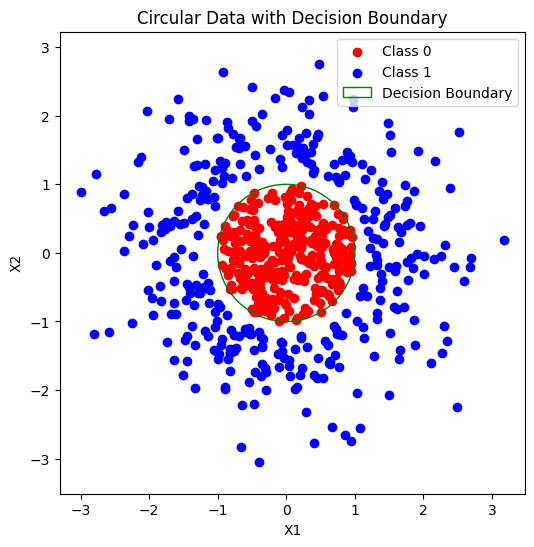

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Generate circular data
X_circle, Y_circle = generate_circle_data(t)

# Fit logistic regression model
model_circle = LogisticRegression().fit(X_circle, Y_circle)

# Get coefficients and intercept
coef_circle = model_circle.coef_[0]
intercept_circle = model_circle.intercept_[0]

# Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Class 1')

# Plot the decision boundary (circle)
circle = plt.Circle(centers[0], radius=1, edgecolor='green', facecolor='none', label='Decision Boundary')
plt.gca().add_patch(circle)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circular Data with Decision Boundary')
plt.legend()
plt.axis('equal')  # Set aspect ratio to equal to display circle properly
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

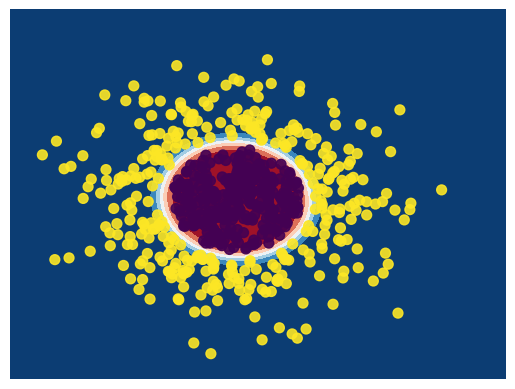

In [78]:
from sklearn.preprocessing import PolynomialFeatures

# Generate circular data
X_circle, Y_circle = generate_circle_data(t)

# Transform the features to include polynomial features up to the second degree
poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(X_circle)

# Fit logistic regression model on transformed features
model_ellipse = LogisticRegression().fit(X_transformed, Y_circle)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Transform the mesh data to include polynomial features
mesh_data_transformed = poly.transform(np.c_[xx.ravel(), yy.ravel()])

# Predict probabilities and classes for the mesh data
A = model_ellipse.predict_proba(mesh_data_transformed)[:, 1].reshape(xx.shape)
Z = model_ellipse.predict(mesh_data_transformed).reshape(xx.shape)

# Plot the contour plot along with training points
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, alpha=0.9)
ax.axis('off')
plt.show()


f) Plot the decision boundary using the code below.

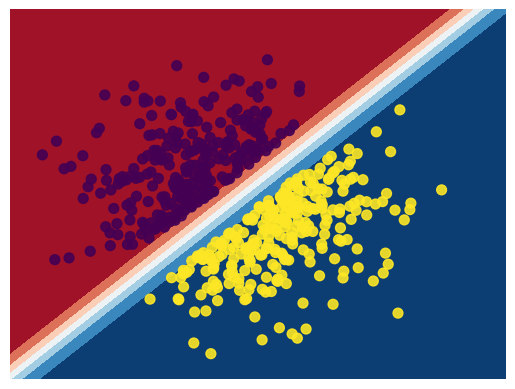

In [79]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

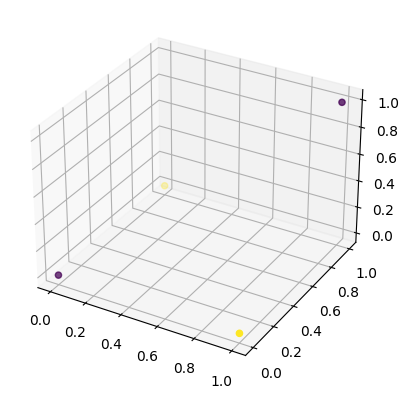

In [80]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

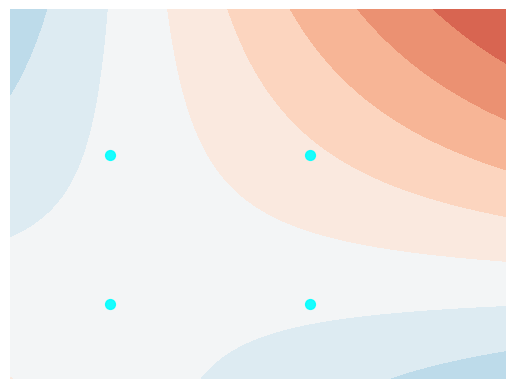

In [81]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


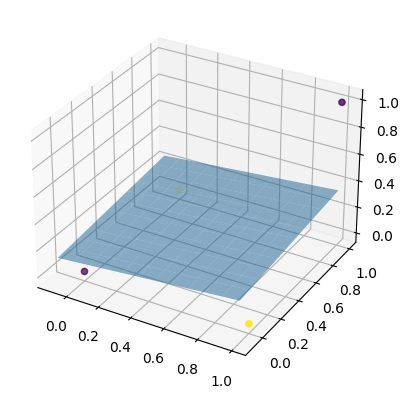

In [82]:
for i in range(2000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


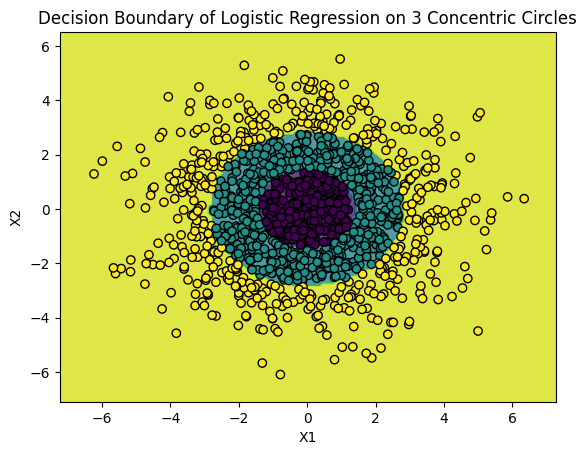

In [84]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)
X, Y = generate_circles_data(t)


poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
mesh_data = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(mesh_data)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary of Logistic Regression on 3 Concentric Circles')
plt.show()